<a href="https://colab.research.google.com/github/aherre52/MAT422/blob/main/HW_2_4_MAT_422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 2.4: Maximum Likelihood Estimation**

Concepts covered:


* 2.4.1. MLE for random samples
* 2.4.2. Linear regression

#   2.4.1. MLE for random samples

Maximum Likelihood Estimation (MLE) is a statistical method used to estimate the parameters of a probability distribution by maximizing the likelihood function. Given a random sample $X_1, X_2, \ldots, X_n$ with unknown parameters $\theta_1, \ldots, \theta_m$, the likelihood function $f(x_1, \ldots, x_n; \theta_1, \ldots, \theta_m)$ is defined as the joint probability of the observed data. The MLE is the value of $\theta$ that maximizes $L(\theta)$, leading to the condition:

$$
f(x_1, \ldots, x_n; \hat{\theta}_1, \ldots, \hat{\theta}_m) \geq f(x_1, \ldots, x_n; \theta_1, \ldots, \theta_m) \text{ for all } \theta_1, \ldots, \theta_m.
$$

This can also be expressed in terms of the log-likelihood function $l(\theta) = \ln L(\theta)$. This method is has become a widely used approach in statistical inference. By deriving the MLE, we can find point estimates for parameters such as the mean and variance in various distributions.


# Clinical testing for a gene

In a laboratory, technicians are conducting genetic testing on 30 individuals to determine the presence of a specific gene. The true probability of an individual carrying this gene is unknown to the technicians, but the true probability is set to 0.38. To estimate the best parameter for the likelihood of gene presence in this population, the lab performs 100 trials (testing different groups of 30 individuals) and records the number of successes (individuals found to carry the gene) in each trial. This scenario follows a binomial distribution, where the technicians aim to use the observed data to maximize the likelihood function and estimate the true probability of carrying the gene.

Will show work to get MLE of binomial distribution below, which will be used in the code:

Derivation of the MLE
The likelihood function is:
$$
L(\theta) = \binom{n}{x} \cdot \theta^x \cdot (1 - \theta)^{n - x}
$$

The log-likelihood function is:
$$
l(\theta) = \ln\left(\binom{n}{x}\right) + x \cdot \ln(\theta) + (n - x) \cdot \ln(1 - \theta)
$$

The derivative of l(θ) with respect to θ:
$$
\frac{d l(\theta)}{d\theta} = \frac{x}{\theta} - \frac{n - x}{1 - \theta}
$$

Setting this to 0 gives us the MLE:
$$
0 = \frac{x}{\theta} - \frac{n - x}{1 - \theta}
$$

Rearranging yields:
$$
\theta = \frac{x}{n}
$$


In [8]:
import numpy as np
from scipy.stats import binom

# Given parameters
p_true = 0.38  # True probability of success
n = 100        # Number of trials
sample_size = 30  # Number of samples to simulate

# Generate sample data
np.random.seed(42)  # For reproducibility

# get the sample data
sample_data = binom.rvs(n, p_true, size=sample_size)
print(f"Sample data (number of successes in {n} trials): {sample_data}")

# Can sum up the total successes in the sample
x = np.sum(sample_data)  # Total number of successes
print(f"Total successes (x): {x}")

# Using above derivation of Maximum Likelihood Estimate (MLE) for θ
# which is given is given by x/n
mle_theta = x / (n * sample_size)  # MLE for θ
print(f"Maximum Likelihood Estimate for θ: {mle_theta:.4f}")



Sample data (number of successes in 100 trials): [38 40 33 31 26 40 40 32 41 38 37 32 43 37 32 38 40 36 46 38 36 43 27 39
 35 32 44 32 44 44]
Total successes (x): 1114
Maximum Likelihood Estimate for θ: 0.3713
Derived MLE for θ based on the formula: 0.3713


#    2.4.2. Linear regression






Given a set of input data points $ \{(x_i, y_i)\}_{i=1}^{n} $, we aim to fit an affine function of the form:

$$
\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}
$$

where $ \hat{y}_i $ is the predicted value, $ x_{ij} $ are the feature values for the $i$-th data point, and $ \beta_0, \beta_1, \dots, \beta_p $ are the coefficients to be determined.

The objective is to minimize the residual sum of squares (RSS), defined as:

$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

This can also be expressed as:

$$
\text{RSS} = \sum_{i=1}^{n} \left( y_i - \left( \beta_0 + \sum_{j=1}^{p} \beta_j x_{ij} \right) \right)^2
$$

We solve this optimization problem by using the least-squares method to find the best-fitting coefficients $ \beta_0, \beta_1, \dots, \beta_p $.

# Housing prices

This code demonstrates the creation of a linear regression model using a housing dataset from Kaggle. The dataset contains various attributes such as area, bedrooms, bathrooms, stories, and parking. The model uses these features to predict housing prices by applying the least squares regression method. A column of ones is added to account for the intercept, and the coefficients for each feature are computed to fit the model.

In [27]:
# although I got the dataset from Kaggle, I uploaded it to my google drive and am using a wget command to retrieve it
# otherwise, I'm not sure how to get it without authenticating my Kaggle account. So for the HW purposes, I hope this suffices

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1h3Fwe2PNu9_ziWLHSeVE3xckrAdIyeAd' -O Housing.csv


--2024-10-06 04:52:25--  https://docs.google.com/uc?export=download&id=1h3Fwe2PNu9_ziWLHSeVE3xckrAdIyeAd
Resolving docs.google.com (docs.google.com)... 142.251.107.113, 142.251.107.139, 142.251.107.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.107.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1h3Fwe2PNu9_ziWLHSeVE3xckrAdIyeAd&export=download [following]
--2024-10-06 04:52:25--  https://drive.usercontent.google.com/download?id=1h3Fwe2PNu9_ziWLHSeVE3xckrAdIyeAd&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29981 (29K) [application/octet-stream]
Saving to: ‘Housing.csv’

Housing.csv         100%[===================>]  29.28K  --.-KB/s    i

Coefficients (β's): [3.31115495e+02 1.67809788e+05 1.13374016e+06 5.47939810e+05
 3.77596289e+05]
Intercept (β0): -145734.48945587987
Regression Equation: Price = -145734.49 + 331.12 * Area + 167809.79 * Bedrooms + 1133740.16 * Bathrooms + 547939.81 * Stories + 377596.29 * Parking


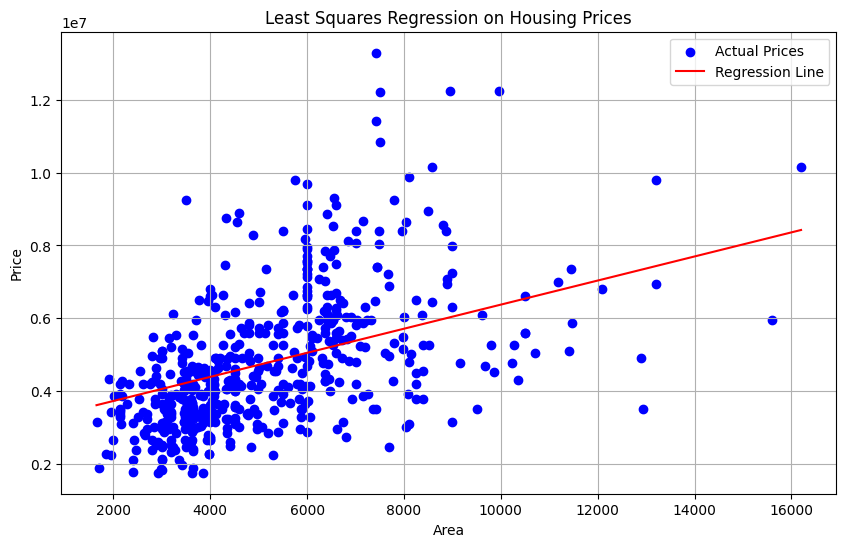

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load in the dataset
data = pd.read_csv('Housing.csv')

# Choose the attributes from the dataset for the linear regression model
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values

# The dependent variable that is often desired to model, which is price of course
y = data['price'].values

# Add a column of ones to X for the intercept term (β0)
X = np.c_[np.ones(X.shape[0]), X]

# Least squares solution for the coefficients (β's)
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# The intercept (β0) is the first coefficient, and the remaining are β1, β2, ...
intercept = beta_hat[0]
coefficients = beta_hat[1:]

# Will now create the regression equation with coefficients and intercept
equation = "Price = {:.2f} + {:.2f} * Area + {:.2f} * Bedrooms + {:.2f} * Bathrooms + {:.2f} * Stories + {:.2f} * Parking".format(
    intercept, coefficients[0], coefficients[1], coefficients[2], coefficients[3], coefficients[4]
)

# Print out the relevant information
print("Coefficients (β's):", coefficients)
print("Intercept (β0):", intercept)
print("Regression Equation:", equation)

# Plot the data
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data prices
plt.scatter(data['area'], y, color='blue', label='Actual Prices')

# Generate predictions for the regression line
# We will plot the effect of 'area' on 'price', keeping other features fixed at their mean value
x_area = np.linspace(data['area'].min(), data['area'].max(), 100)

# Create an array for the other features, repeated for each x_area value
bedrooms_mean = np.full(x_area.shape[0], np.mean(data['bedrooms']))
bathrooms_mean = np.full(x_area.shape[0], np.mean(data['bathrooms']))
stories_mean = np.full(x_area.shape[0], np.mean(data['stories']))
parking_mean = np.full(x_area.shape[0], np.mean(data['parking']))

# Create a DataFrame for predictions with area and mean values of other variables
X_area = np.c_[np.ones(x_area.shape[0]), x_area, bedrooms_mean, bathrooms_mean, stories_mean, parking_mean]

# Predict prices based on the linear model. This will give the array
# of prices which will be plotted
predicted_prices = X_area @ beta_hat

# Plot the regression line, make it red to contrast the blue scatter dots
plt.plot(x_area, predicted_prices, color='red', label='Regression Line')

# Add in descriptive labels and title
plt.title('Least Squares Regression on Housing Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
